In [1]:
# dataframet hämtas från föregående del av rapporten
# källa: https://stackoverflow.com/questions/62063745/moving-dataframes-between-notebooks

%store -r

## Visualiseringar
Det fanns misstankar om att exempelvis personer med högt blodtryck och personer med högt BMI skulle komma att vara överrepresenterade bland patienter med hjärt-kärlsjukdomar. En snabb visuell undersökning om så var fallet, gjordes med hjälp av stapeldiagram:

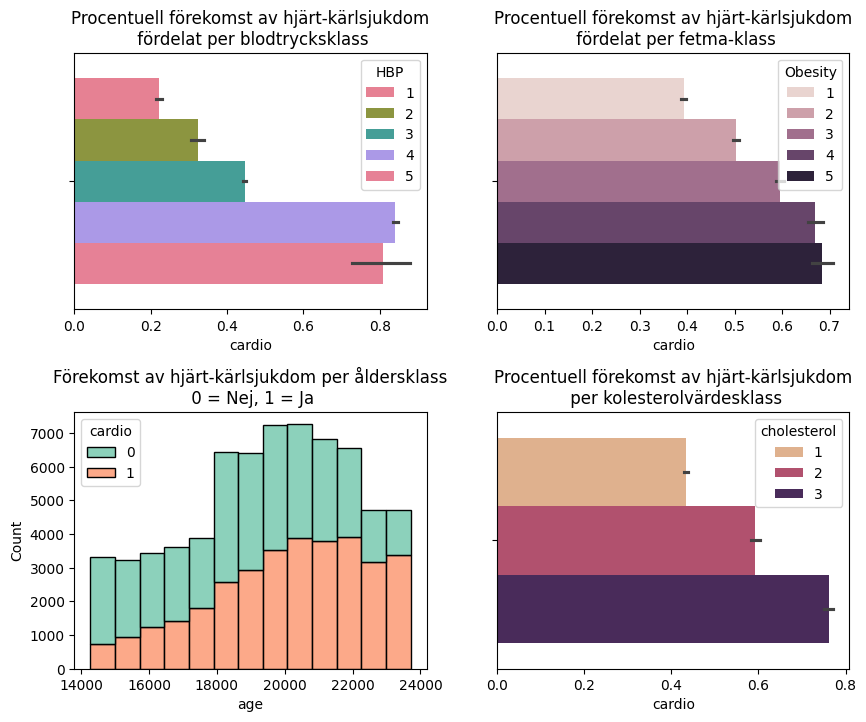

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax=plt.subplots(2, 2, figsize=(10,8))

df.sort_values("ap_lo", inplace=True)
sns.barplot(df, x="cardio", hue="HBP", ax=ax[0,0], palette="husl").set(title="Procentuell förekomst av hjärt-kärlsjukdom\n fördelat per blodtrycksklass");
df.sort_values("BMI", inplace=True)
sns.barplot(df, x="cardio", hue="Obesity", ax=ax[0,1]).set(title="Procentuell förekomst av hjärt-kärlsjukdom\n fördelat per fetma-klass");
sns.histplot(df, x="age", hue="cardio", ax=ax[1,0], multiple="stack", binwidth=730, palette="Set2").set(title="Förekomst av hjärt-kärlsjukdom per åldersklass\n 0 = Nej, 1 = Ja")
sns.barplot(df, x="cardio", hue="cholesterol", ax=ax[1,1], palette="flare").set(title="Procentuell förekomst av hjärt-kärlsjukdom\n per kolesterolvärdesklass")
plt.subplots_adjust(hspace=.4);

Det framgick tydligt att det var procentuellt vanligare med hjärt-kärlsjukdomar för personer med högt blodtryck (den allra högsta gruppen innehöll endast ett litet antal personer, därför blev osäkerheten större), högt BMI och höga kolesterolvärden, samt att det var procentuellt vanligare i högre åldrar. Detta var i linje med vad som antagits.

För att ytterligare undersöka vilka eventuella samband som fanns mellan de olika prediktorerna, gjordes en *heatmap*, där ljus färg angav stark positiv korrelation, och mörk färg angav negativ korrelation (inga prediktorer hade någon *stark* negativ korrelation). Lila/rosa färg angav svag, eller ingen korrelation alls.

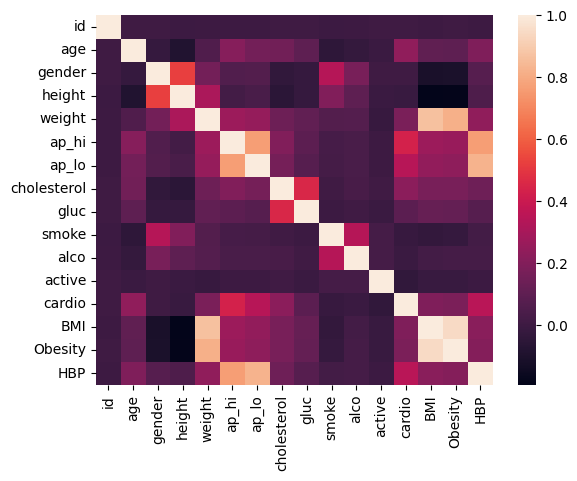

In [3]:
sns.heatmap(df.corr(), annot=False);

Tydligast negativ korrelation kunde utläsas mellan *height* och *BMI* (och *Obesity*, som är klassificeringen av BMI). Detta var högst naturligt då hög kroppslängd ger lägre BMI, eftersom kroppslängden är omvänt proportionell mot kvadratroten ut BMI.

Det fanns starka positiva korrelationer mellan *BMI* och *Obesity*, respektive mellan *ap_hi*/*ap_lo* och *HBP* men det berodde naturligtvis på att BMI-värdena och blodtrycksvärdena legat till grund för respektive klassindelning. Den positiva korrelationen mellan *weight* och *BMI* hade också sin direkta förklaring i beräkningen av BMI. Vidare syntes förstås även ett inbördes samband mellan *ap_hi* och *ap_lo*; har man högt systoliskt tryck så har man i allmänhet även ett högt diastoliskt tryck.

Sambandet mellan kön och längd var inte heller det minsta förvånande. Vidare kunde konstateras att det fanns en viss korrelation mellan höga kolesterol- och höga glukosvärden, samt mellan rökning- och alkoholvanor. (Däremot inget tydligt samband mellan alkoholintag och vikt, kanske något förvånande?)

Då responsvariabeln *cardio* (förekomst av hjärt-kärlsjukdom) undersöktes, konstaterades att de tydligaste sambanden fanns med ålder, kolesterolvärden, blodtryck och BMI, vilket var helt i linje med vad som framkom av stapeldiagrammen ovan. 